In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/optimize/_trlib/__init__.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trlib import TRLIBQuadraticSubproblem
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
import smart
import coronagraph as cg

/Users/Jake/Projects/Packages/photochem_smart/smart/extra/gas_info.py:67: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  'mass', 'minwn', 'maxwn', 'n'])
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:94: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size 

In [3]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [4]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [5]:
lammin = 0.2
lammax = 2.0

In [6]:
lam_earth = spectroscopy.LAMHR[(spectroscopy.LAMHR > lammin) & (spectroscopy.LAMHR < lammax)]
ahr_earth = spectroscopy.AHR[(spectroscopy.LAMHR > lammin) & (spectroscopy.LAMHR < lammax)]
fs_earth = spectroscopy.FSTAR[(spectroscopy.LAMHR > lammin) & (spectroscopy.LAMHR < lammax)]

In [7]:
data = np.genfromtxt("../inputs/Hazy_ArcheanEarth_geo_albedo.txt")
lam_arch = data[:,0][(data[:,0] > lammin) & (data[:,0] < lammax)]
ahr_arch = data[:,1][(data[:,0] > lammin) & (data[:,0] < lammax)]
fs_arch = data[:,2][(data[:,0] > lammin) & (data[:,0] < lammax)]

In [26]:
data = np.genfromtxt("../inputs/proterozoic_low_o2_geo_albedo.txt")
lam_prol = data[:,0][(data[:,0] > lammin) & (data[:,0] < lammax)]
ahr_prol = data[:,1][(data[:,0] > lammin) & (data[:,0] < lammax)]
#fs_prol = data[:,2][(data[:,0] > lammin) & (data[:,0] < lammax)] # This looks wonky
fs_prol = np.interp(lam_prol, lam_earth, fs_earth)

In [28]:
data = np.genfromtxt("../inputs/proterozoic_hi_o2_geo_albedo.txt")
lam_proh = data[:,0][(data[:,0] > lammin) & (data[:,0] < lammax)]
ahr_proh = data[:,1][(data[:,0] > lammin) & (data[:,0] < lammax)]
#fs_proh = data[:,2][(data[:,0] > lammin) & (data[:,0] < lammax)] # This looks wonky
fs_proh = np.interp(lam_proh, lam_earth, fs_earth)

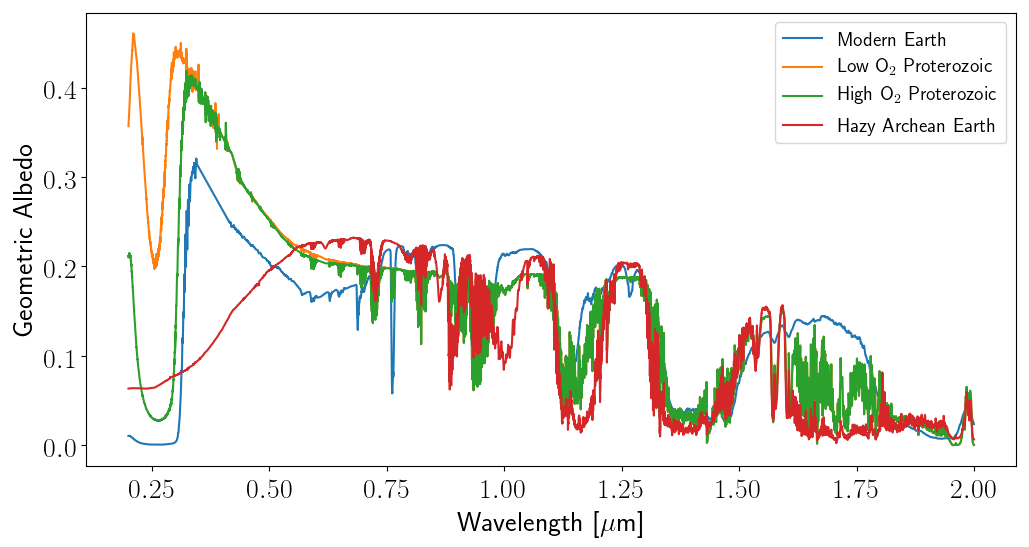

In [200]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Geometric Albedo")

ax.plot(lam_earth, ahr_earth, label = "Modern Earth")
ax.plot(lam_prol, ahr_prol, label = "Low O$_2$ Proterozoic")
ax.plot(lam_proh, ahr_proh, label = "High O$_2$ Proterozoic")
ax.plot(lam_arch, ahr_arch, label = "Hazy Archean Earth")

ax.legend(fontsize = 14)

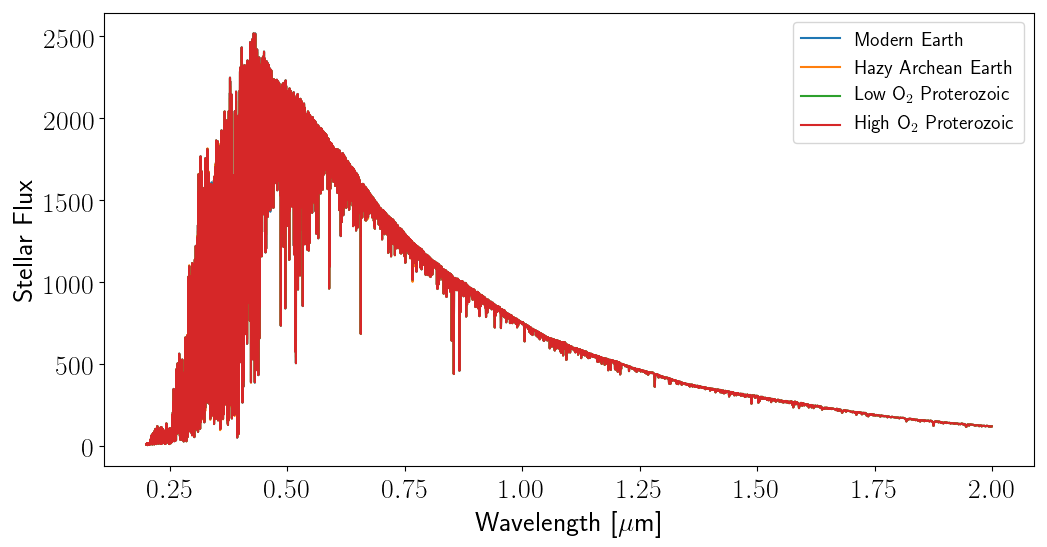

In [29]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Stellar Flux")

ax.plot(lam_earth, fs_earth, label = "Modern Earth")
ax.plot(lam_arch, fs_arch, label = "Hazy Archean Earth")
ax.plot(lam_prol, fs_prol, label = "Low O$_2$ Proterozoic")
ax.plot(lam_proh, fs_proh, label = "High O$_2$ Proterozoic")

ax.legend(fontsize = 14)

# Modern Earth

In [135]:
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

name = "Modern Earth"
drmA.LAMHR = lam_earth
drmA.AHR = ahr_earth
drmA.FSTAR = fs_earth

"""
name = "Hazy Archean Earth"
drmA.LAMHR = lam_arch
drmA.AHR = ahr_arch
drmA.FSTAR = fs_arch
"""

"""
name = "High O2 Proterozoic"
drmA.LAMHR = lam_proh
drmA.AHR = ahr_proh
drmA.FSTAR = fs_proh
"""

"""
name = "Low O2 Proterozoic"
drmA.LAMHR = lam_prol
drmA.AHR = ahr_prol
drmA.FSTAR = fs_prol
"""

'\nname = "Low O2 Proterozoic"\ndrmA.LAMHR = lam_prol\ndrmA.AHR = ahr_prol\ndrmA.FSTAR = fs_prol\n'

In [136]:
drmA.generate_exptime_table()
#drmA.exptime_table.head(n=10)

(0.0, 1.9179561425814848)

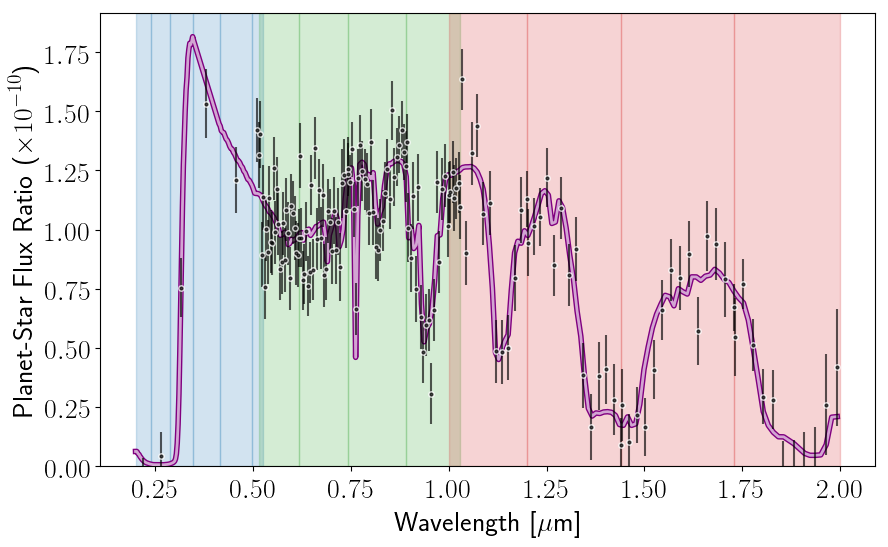

In [137]:
# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 7.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.
drmA.cn.SILENT = False

output = drmA.complete_spectrum_time(plot=False)

spectrum = output[2]

iremove = []
cc = ["C0", "C2", "C3"]

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")

for i in range(len(drmA.bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(drmA.AHR, drmA.LAMHR, drmA.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

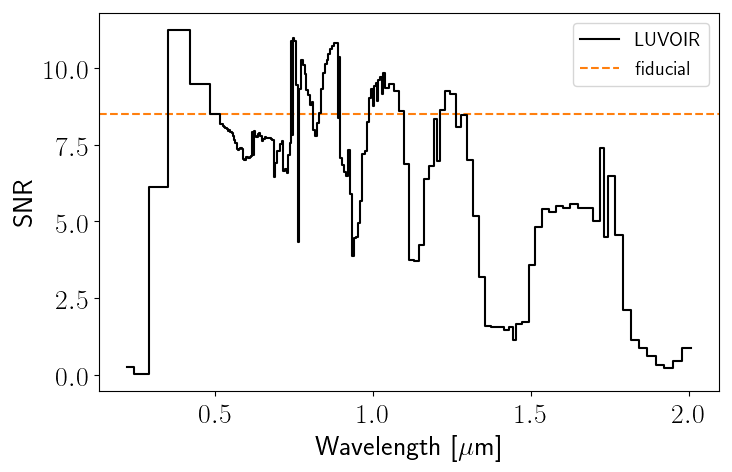

In [138]:
wl = []
snr = []
crat = []
csig = []
for i in range(len(drmA.bp_names)):
    if i not in iremove:
        wl.append(spectrum[0][i])
        snr.append(spectrum[2][i]/spectrum[4][i])
        crat.append(spectrum[2][i])
        csig.append(spectrum[4][i])
        
wl = np.hstack(wl)
snr = np.hstack(snr)
crat = np.hstack(crat)
csig = np.hstack(csig)

isort = np.argsort(wl)

wl = wl[isort]
snr = snr[isort]
crat = crat[isort]
csig = csig[isort]

fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("SNR")
ax.plot(wl, snr, alpha = 1.0, color = "k", zorder = 70, label = "LUVOIR", ls="steps-mid")
#ax.plot(lam_snr_feng, snr_lam_feng*10., label = "Feng et al. (2018)", ls="steps-mid")
ax.axhline(drmA.wantSNR, ls = "--", color = "C1", label = "fiducial")

ax.legend(fontsize = 14)

In [171]:
def bandsnr(wl, snr, bandlims, bandname = None):
    
    # Specify band via wavelength
    icont = np.array([np.argmin(np.fabs(wl - bandlims[0])), np.argmin(np.fabs(wl - bandlims[1]))])
    iband = np.arange(icont[0]+1, icont[1])
    ibottom = np.argmin(np.fabs(snr[iband]))

    # Calculate the continuum planet photon counts and contrast ratio
    #ccont = cg.observe.interp_cont_over_band(cn.lam, cn.cp, icont, iband)
    csnr = cg.observe.interp_cont_over_band(wl, snr, icont, iband)

    snr_band = np.sqrt(np.sum((csnr - snr[iband])**2.))
    
    fig, ax = plt.subplots()
    ax.set_title(bandname)
    ax.set_xlim(0.8*bandlims[0], 1.2*bandlims[1])
    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel("SNR")
    ax.plot(wl, snr, alpha = 1.0, color = "k", zorder = 70, label = "LUVOIR", ls="steps-mid")
    ax.plot(wl[iband], snr[iband], alpha = 1.0, color = "C2", zorder = 70, label = "band", ls="steps-mid")
    ax.plot(wl[iband], csnr, alpha = 1.0, color = "C0", zorder = 70, label = "continuum", ls="steps-mid")
    ax.text(wl[iband][ibottom], np.max(csnr), "$%.1f \sigma$" %snr_band, ha = "center", va = "bottom")
    
    return snr_band

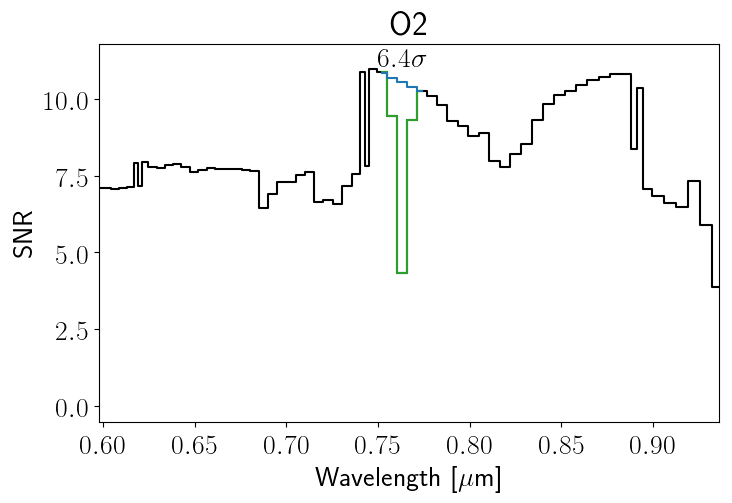

In [140]:
snro2 = bandsnr(wl, snr, [0.747, 0.78], bandname="O2")

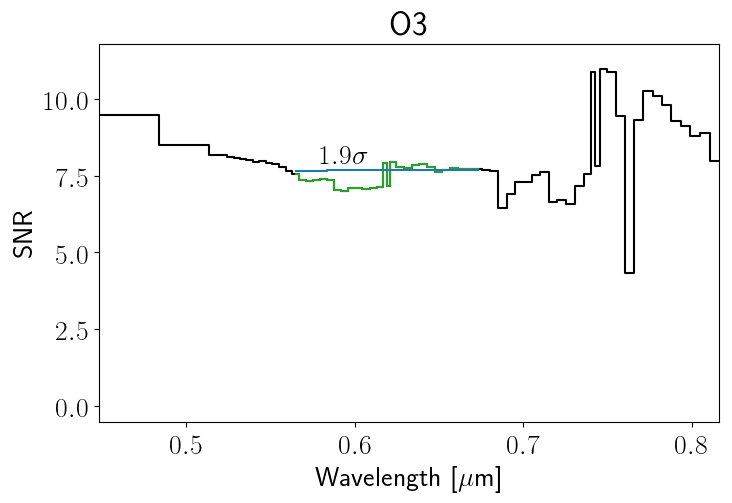

In [141]:
snro3 = bandsnr(wl, snr, [0.56, 0.68], bandname="O3")

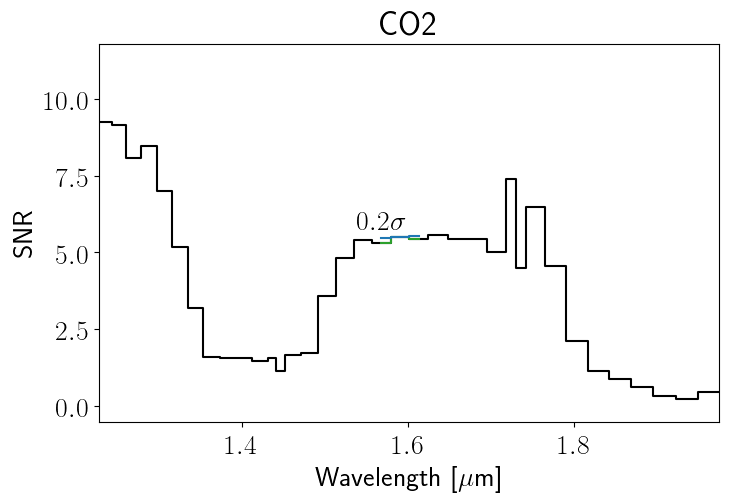

In [149]:
snr_co2 = bandsnr(wl, snr, [1.535, 1.645], bandname="CO2")

## Hazy Archean Earth

(0.0, 1.9048996388214268)

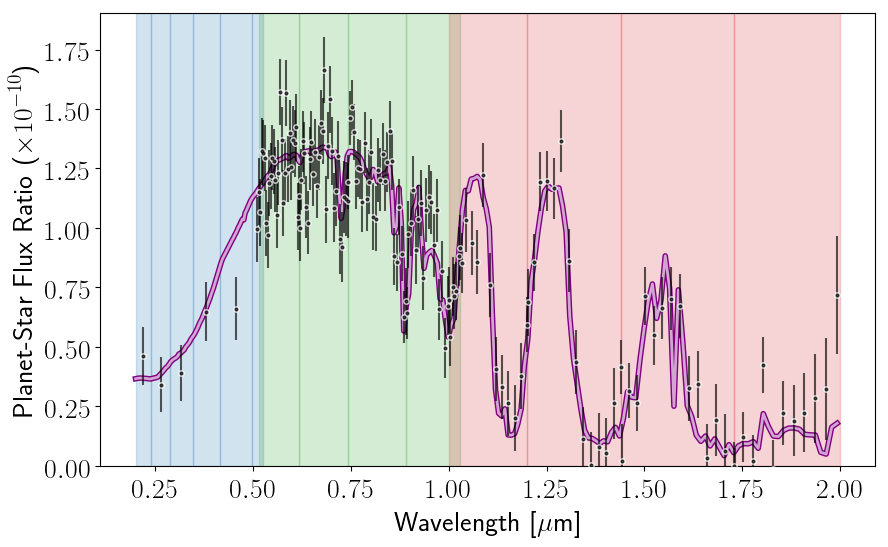

In [199]:
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

#"""
name = "Hazy Archean Earth"
drmA.LAMHR = lam_arch
drmA.AHR = ahr_arch
drmA.FSTAR = fs_arch
#"""

drmA.generate_exptime_table()
#drmA.exptime_table.head(n=10)

# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 7.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.
drmA.cn.SILENT = False

output = drmA.complete_spectrum_time(plot=False)

spectrum = output[2]

iremove = []
cc = ["C0", "C2", "C3"]

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")

for i in range(len(drmA.bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(drmA.AHR, drmA.LAMHR, drmA.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

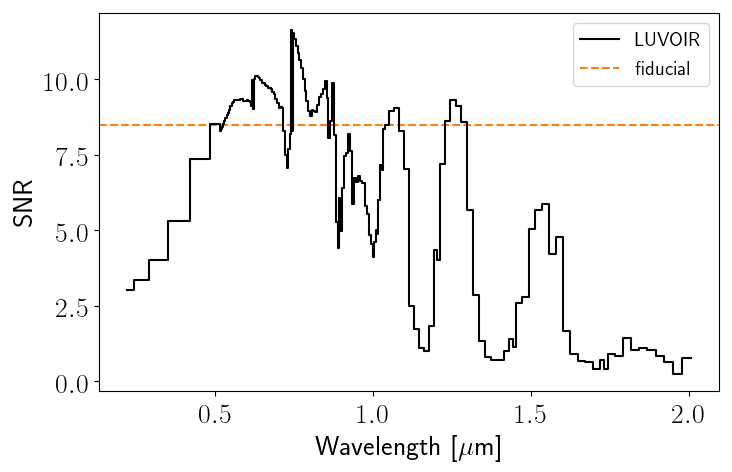

In [152]:
wl = []
snr = []
crat = []
csig = []
for i in range(len(drmA.bp_names)):
    if i not in iremove:
        wl.append(spectrum[0][i])
        snr.append(spectrum[2][i]/spectrum[4][i])
        crat.append(spectrum[2][i])
        csig.append(spectrum[4][i])
        
wl = np.hstack(wl)
snr = np.hstack(snr)
crat = np.hstack(crat)
csig = np.hstack(csig)

isort = np.argsort(wl)

wl = wl[isort]
snr = snr[isort]
crat = crat[isort]
csig = csig[isort]

fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("SNR")
ax.plot(wl, snr, alpha = 1.0, color = "k", zorder = 70, label = "LUVOIR", ls="steps-mid")
#ax.plot(lam_snr_feng, snr_lam_feng*10., label = "Feng et al. (2018)", ls="steps-mid")
ax.axhline(drmA.wantSNR, ls = "--", color = "C1", label = "fiducial")

ax.legend(fontsize = 14)

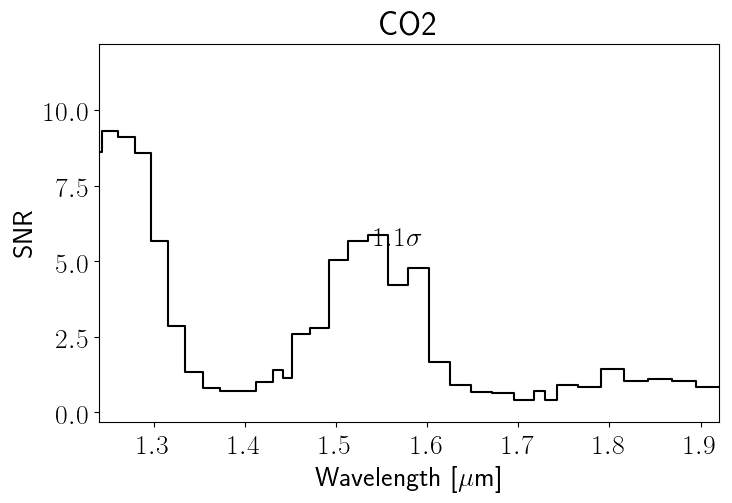

In [187]:
snr_co2 = bandsnr(wl, snr, [1.55, 1.60], bandname="CO2")

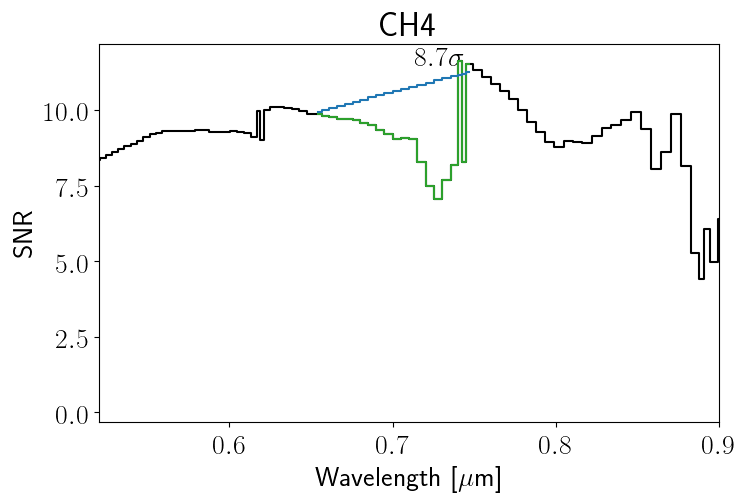

In [190]:
snr_ch4 = bandsnr(wl, snr, [.65, .75], bandname="CH4")

## High O2 Proterozoic

(0.0, 2.4923500117973942)

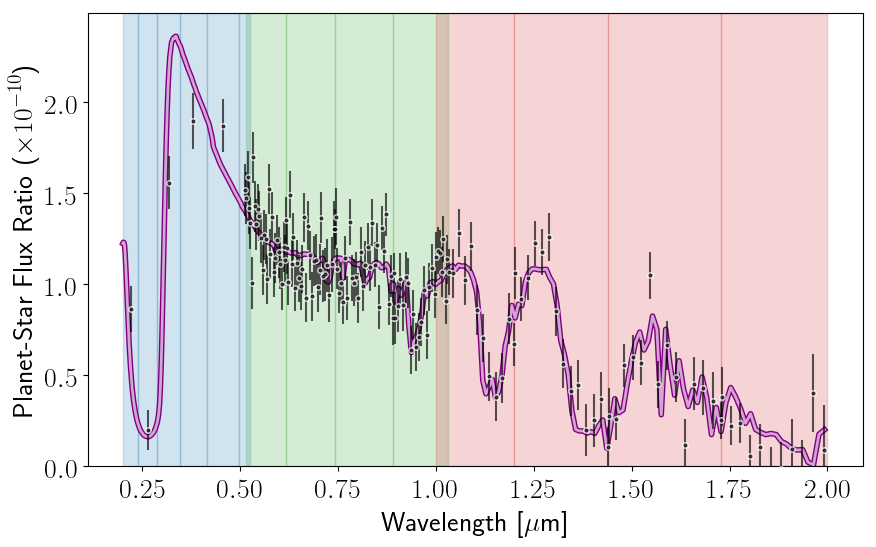

In [191]:
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

#"""
name = "High O2 Proterozoic"
drmA.LAMHR = lam_proh
drmA.AHR = ahr_proh
drmA.FSTAR = fs_proh
#"""

drmA.generate_exptime_table()
#drmA.exptime_table.head(n=10)

# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 7.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.
drmA.cn.SILENT = False

output = drmA.complete_spectrum_time(plot=False)

spectrum = output[2]

iremove = []
cc = ["C0", "C2", "C3"]

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")

for i in range(len(drmA.bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(drmA.AHR, drmA.LAMHR, drmA.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

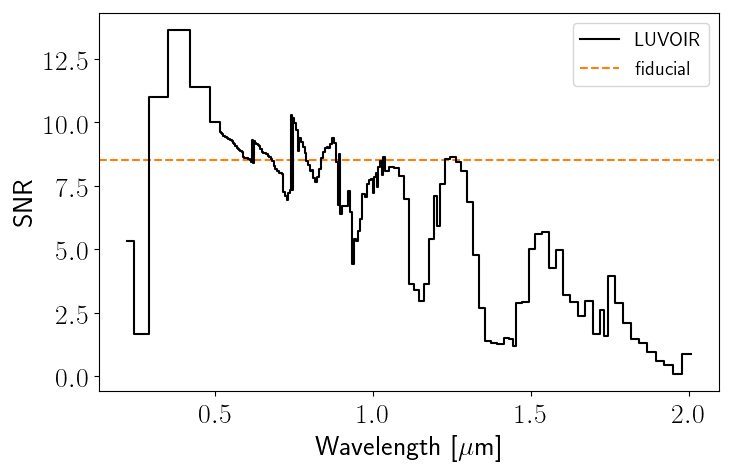

In [193]:
wl = []
snr = []
crat = []
csig = []
for i in range(len(drmA.bp_names)):
    if i not in iremove:
        wl.append(spectrum[0][i])
        snr.append(spectrum[2][i]/spectrum[4][i])
        crat.append(spectrum[2][i])
        csig.append(spectrum[4][i])
        
wl = np.hstack(wl)
snr = np.hstack(snr)
crat = np.hstack(crat)
csig = np.hstack(csig)

isort = np.argsort(wl)

wl = wl[isort]
snr = snr[isort]
crat = crat[isort]
csig = csig[isort]

fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("SNR")
ax.plot(wl, snr, alpha = 1.0, color = "k", zorder = 70, label = "LUVOIR", ls="steps-mid")
#ax.plot(lam_snr_feng, snr_lam_feng*10., label = "Feng et al. (2018)", ls="steps-mid")
ax.axhline(drmA.wantSNR, ls = "--", color = "C1", label = "fiducial")

ax.legend(fontsize = 14)

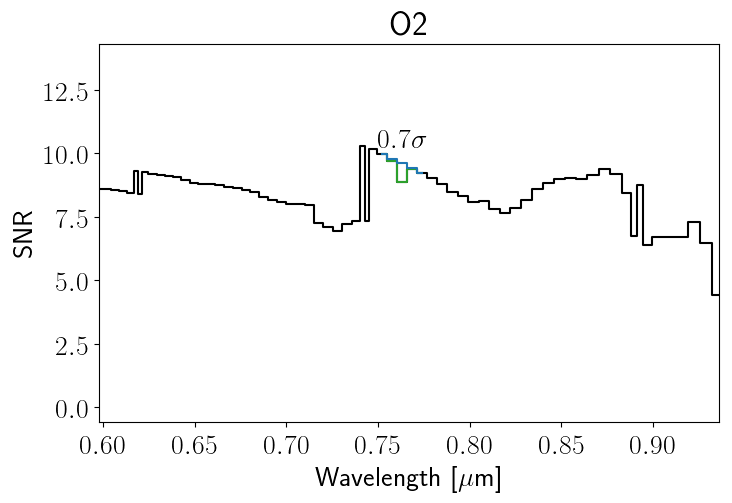

In [194]:
snro2 = bandsnr(wl, snr, [0.747, 0.78], bandname="O2")

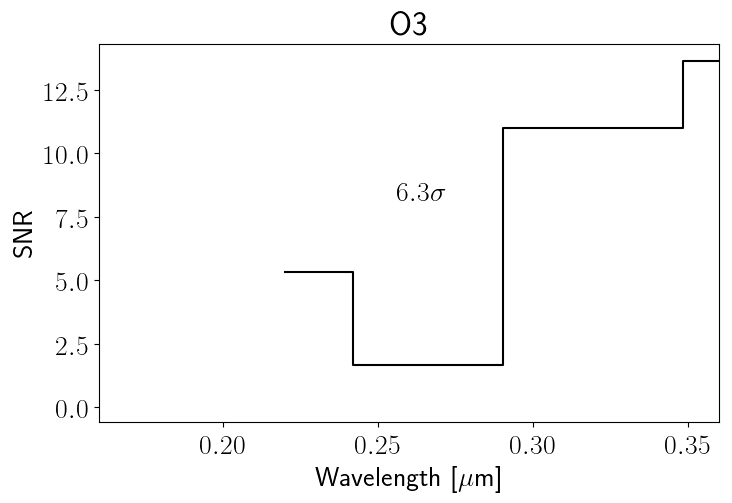

In [195]:
snro3 = bandsnr(wl, snr, [0.2, 0.3], bandname="O3")

## Low O2 Proterozoic

(0.0, 2.9728320478717745)

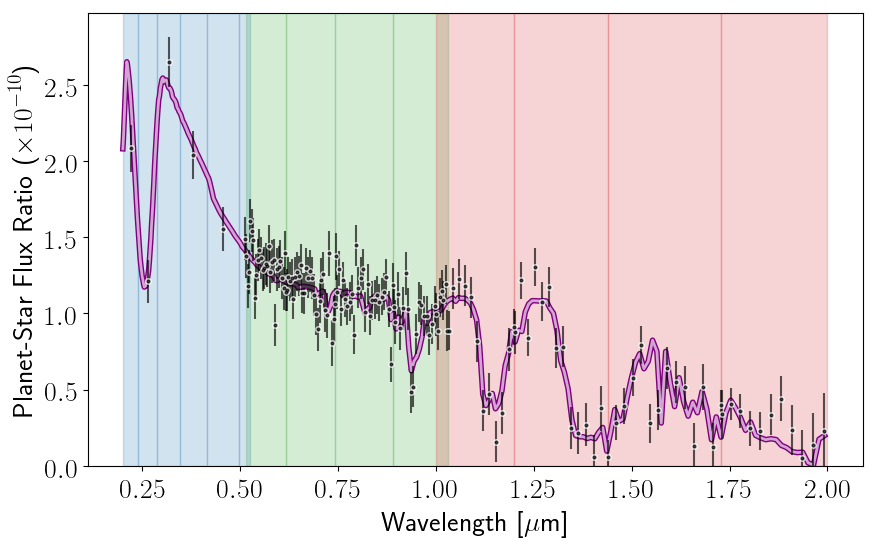

In [196]:
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

#"""
name = "Low O2 Proterozoic"
drmA.LAMHR = lam_prol
drmA.AHR = ahr_prol
drmA.FSTAR = fs_prol
#"""

drmA.generate_exptime_table()
#drmA.exptime_table.head(n=10)

# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 7.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.
drmA.cn.SILENT = False

output = drmA.complete_spectrum_time(plot=False)

spectrum = output[2]

iremove = []
cc = ["C0", "C2", "C3"]

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")

for i in range(len(drmA.bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(drmA.AHR, drmA.LAMHR, drmA.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

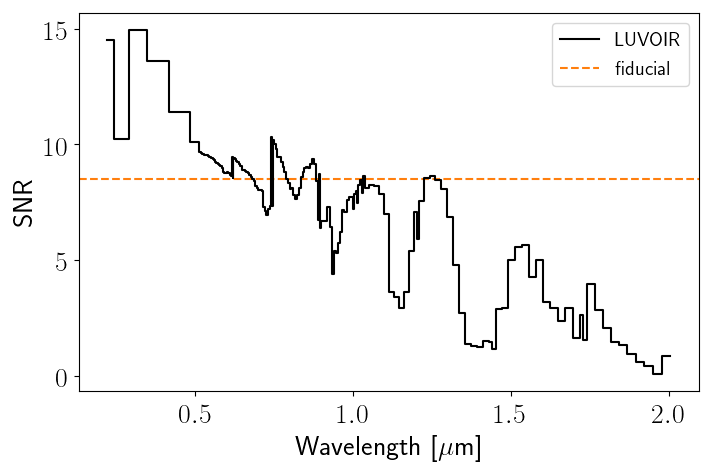

In [197]:
wl = []
snr = []
crat = []
csig = []
for i in range(len(drmA.bp_names)):
    if i not in iremove:
        wl.append(spectrum[0][i])
        snr.append(spectrum[2][i]/spectrum[4][i])
        crat.append(spectrum[2][i])
        csig.append(spectrum[4][i])
        
wl = np.hstack(wl)
snr = np.hstack(snr)
crat = np.hstack(crat)
csig = np.hstack(csig)

isort = np.argsort(wl)

wl = wl[isort]
snr = snr[isort]
crat = crat[isort]
csig = csig[isort]

fig, ax = plt.subplots()
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("SNR")
ax.plot(wl, snr, alpha = 1.0, color = "k", zorder = 70, label = "LUVOIR", ls="steps-mid")
#ax.plot(lam_snr_feng, snr_lam_feng*10., label = "Feng et al. (2018)", ls="steps-mid")
ax.axhline(drmA.wantSNR, ls = "--", color = "C1", label = "fiducial")

ax.legend(fontsize = 14)

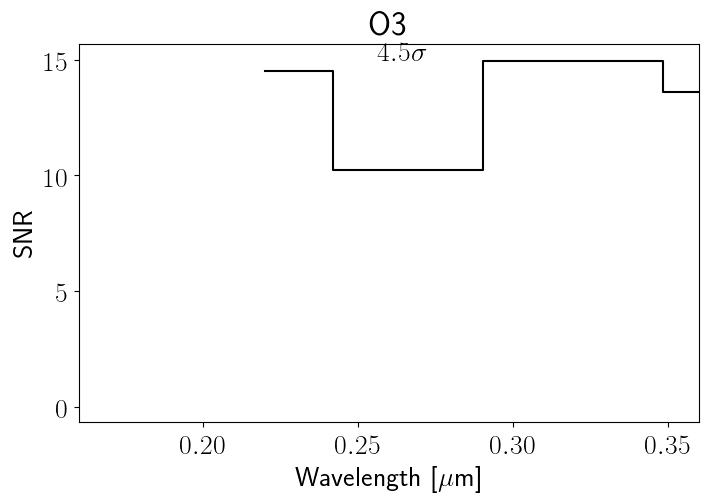

In [198]:
snro3 = bandsnr(wl, snr, [0.2, 0.3], bandname="O3")